<a href="https://colab.research.google.com/github/nicatglyv/data/blob/main/Copy_of_AutoCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


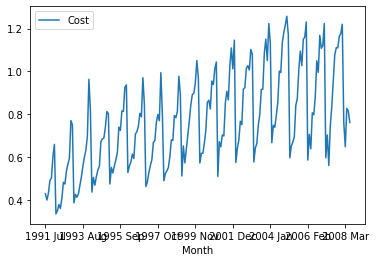

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [ ]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [ ]:
#1
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


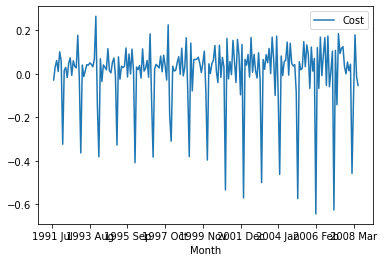

In [ ]:
dap = ap1 - ap1.shift(1)
dap.plot()

Ho:Series is not stationary
Ha:Series is stationary
Reject null hyphotesis

In [ ]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Ho:Series is not stationary
Ha:Series is stationary
Accept null hyphotesis

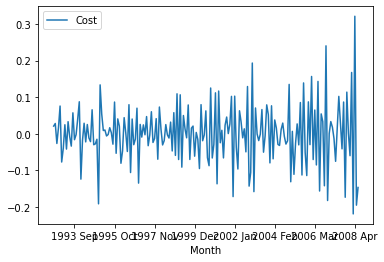

In [ ]:
dap = dap - dap.shift(12)
dap.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.070403
p-value: 0.000016
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


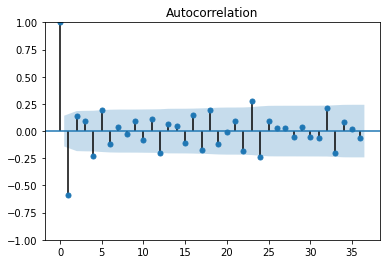

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


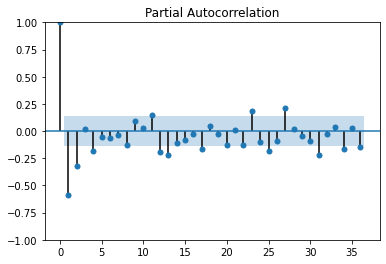

In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap['Cost'], lags=36)
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(0,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Cost   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 279.164
Date:                            Wed, 25 May 2022   AIC                           -552.329
Time:                                    19:14:29   BIC                           -542.572
Sample:                                07-01-1991   HQIC                          -548.377
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7581      0.046    -16.443      0.000      -0.848      -0.668
ma.S.L12      -0.5650      0.056    -10.177      0.000      -0.674      -0.456
sigma2         0.0031      0.000     10.054      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.14   Prob(JB):                         0.45
Heteroskedasticity (H):               2.31   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(1,1,1),seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 264.817
Date:                             Wed, 25 May 2022   AIC                           -523.634
Time:                                     19:14:30   BIC                           -513.878
Sample:                                 07-01-1991   HQIC                          -519.682
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2799      0.074     -3.776      0.000      -0.425      -0.135
ma.L1         -0.5771      0.069     -8.324      0.000      -0.713      -0.441
sigma2         0.0036      0.000     12.859      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train=ap1[:-12]
test=ap1[-12:]
train

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2007 Feb,0.597753
2007 Mar,0.704398
2007 Apr,0.561760


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


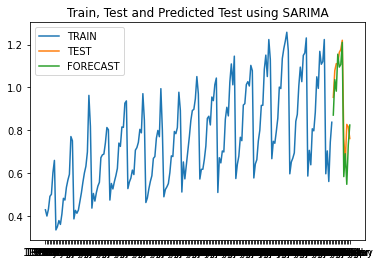

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']
#As we take ln , convert back to original series using exp


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using SARIMA');

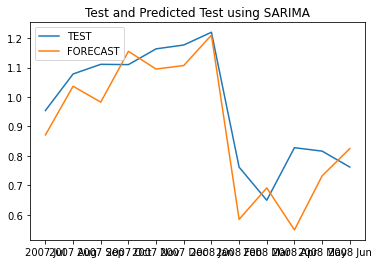

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using SARIMA');

In [ ]:
#Evaluate forecasting Performance

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.0909268178421108
Mean Squared Error = 0.01324054374415085
Mean Absolute Percentage Error = 10.22899589074688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


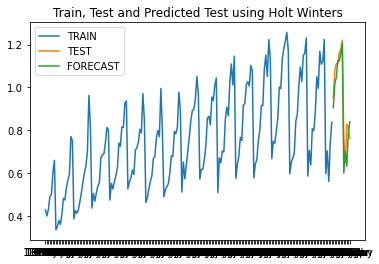

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

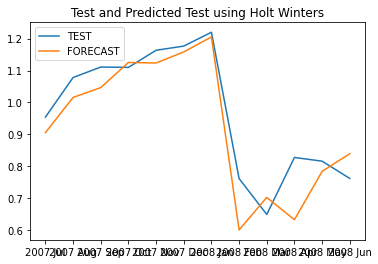

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');

In [ ]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06513513772255573
Mean Squared Error = 0.007204818383369751
Mean Absolute Percentage Error = 7.5956025277059425


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


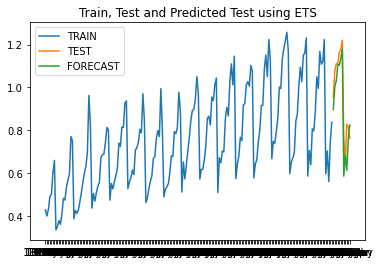

In [ ]:
import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='mul', trend='mul',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

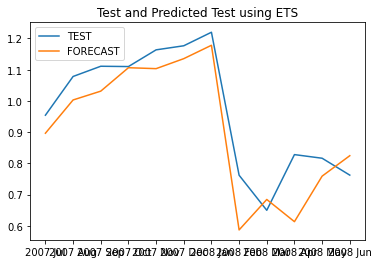

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ETS');

In [ ]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07535343950389495
Mean Squared Error = 0.008976048645058084
Mean Absolute Percentage Error = 8.513081505501567


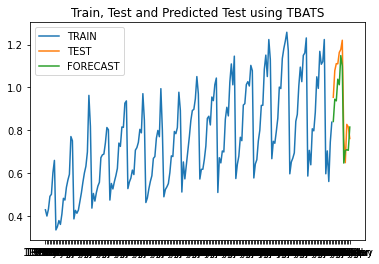

In [ ]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  # shall not try only models with ARMA
    use_box_cox=False # will not use Box-Cox
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

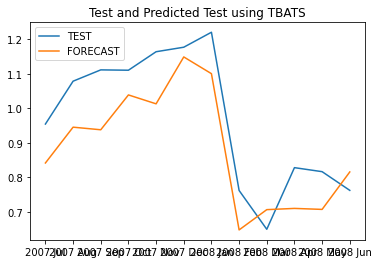

In [ ]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using TBATS');

In [ ]:
#Evaluate forecasting Performance -TBATS
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.10345093536180565
Mean Squared Error = 0.012378694237250612
Mean Absolute Percentage Error = 10.81564711343515
